In [1]:
#########
# Investigating factors influencing the response to the intervention at +1 or +2 years: sex, age group, baseline level of MVPA, MVPA changes at + 1year
# The results are presented in Table 5 and 6.
#########

In [2]:
##############################
import pandas as pd
pd.__version__
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pingouin as pg
from pingouin import pairwise_ttests, read_dataset
from pingouin import corr
##############################
# For diplaying on 90% of your screen widths
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:90% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

C:\Users\BMELAB\Anaconda3\lib\site-packages\distributed\utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  % (host, default, e), RuntimeWarning)


## Settings

In [3]:
##################################
# Period of exploration
period = ['0','1','2'] 
##################################
# Posthoc corrections. Uncomment the one to use.
correc='holm' #
# Pairwise_ttest
MARGINAL=True
PARAMETRIC=True

###### Build the path and load data

In [4]:
# path
path = 'C:\\Users\\  \\' #Enter your path
print(path)
data_set = []
data_set.append(pd.read_csv(path+'data_year_0S.csv',index_col=0))
data_set.append(pd.read_csv(path+'data_year_1S.csv',index_col=0))
data_set.append(pd.read_csv(path+'data_year_2S.csv',index_col=0))
print('number of data in year 0 :', data_set[0].shape[0])
print('number of data in year 1 :', data_set[1].shape[0])
print('number of data in year 2 :', data_set[2].shape[0])

C:\Users\BMELAB\Desktop\JUXIS Code\
number of data in year 0 : 574
number of data in year 1 : 512
number of data in year 2 : 469


## Who is responding to the intervention (ANOVA) ?
<p> Question #4: Which factors influence the response to teh PA intervention, and the retention of the effect beyond the 1-year intervention period?
<\p>

In [5]:
def GeneralStats＿Who():

    Mean = daa[int(year)].groupby(candidate)[of_int].mean()
    Std = daa[int(year)].groupby(candidate)[of_int].std()
    NN = daa[int(year)].groupby(candidate)[of_int].count()
    STATS = pd.DataFrame({'Mean': Mean, 'std': Std, 'N': NN}, columns=['Mean','std','N'])

    return(STATS)

In [6]:
def AnovaPlot_Who():
    plt.figure()
    %matplotlib inline
    fig, ax = plt.subplots(1, 2, sharex='row')
    sns.set(context='notebook', style='whitegrid', palette='deep', font_scale=1, color_codes=True, rc={'figure.figsize':(11.7,8.27)})
    
    ax[0] = sns.pointplot(x = 'period', y=of_int, hue=candidate, data=daaa, ax=ax[0])
    ax[0].set_xticklabels(['baseline', 'year 1', 'year 2'], fontsize=12)
    ax[0].set_title(of_int+' (lineplots)', fontsize=12)
    
    ax[1] = sns.boxplot(x = 'period', y=of_int, hue=candidate, palette="Set3", data=daaa,
             linewidth=3, showfliers=False)
    ax[1].set_xticklabels(['baseline', 'year 1', 'year 2'], fontsize=12)
    ax[1].set_title(of_int+' (boxplots)', fontsize=12)
    
    #
    plt.show() # 

    
    

In [7]:
def AnovaStats_Who(daaa):
    daaa=daaa
    aov = pg.mixed_anova(dv=of_int, within='period', subject='subject_ID', between=candidate, data=daaa,
                            correction=True)
    # Pretty printing of ANOVA summary
    print(of_int,', ANOVA :')
    display(aov[['Source','SS','DF1','DF2','MS','F','p-unc','p-GG-corr','np2','eps']])
    if aov['p-unc'].loc[2] < 0.05:
        print('Interaction effect : significant !')
        print('----------------------------------------------')
        print(of_int,'- posthocs :')
        posthocs_group_period = pairwise_ttests(dv=of_int, within=['period'],
                               subject='subject_ID', between=[candidate,'period'],
                               padjust=correc, data=daaa, parametric=PARAMETRIC, marginal=MARGINAL)
        posthocs_period_group = pairwise_ttests(dv=of_int, within=['period'],
                               subject='subject_ID', between=['period',candidate],
                               padjust=correc, data=daaa, parametric=PARAMETRIC, marginal=MARGINAL)
        display(posthocs_group_period[~(posthocs_group_period[candidate] == '-') & (posthocs_group_period.A == 0)].drop(['Contrast','Paired','p-adjust','BF10','Tail','Parametric'], axis=1).round(3))
        display(posthocs_period_group[~(posthocs_period_group.period == '-')].drop(['Contrast','Paired','p-adjust','BF10','Tail','Parametric'], axis=1).round(3))

    else:
        print('No interaction')
        print('----------------------------------------------')
        print('No posthoc for', of_int,'or change the statistics parameters and retest')

In [8]:
of_int = 'PA_(METs / hour)'
# Prepare the dataframe
print('Preparation of the dataframes')
daa = []
stats = []

# Build a base
for year in range(len(period)):
    da = []
    stats_intervention = []
    stats_control = []
    stats_active = []
    stats_year = []
    if year == 0:
        da = data_set[year][['subject_ID','group','sex','period','age_group', of_int]].dropna()
        
    else:    
        da = pd.merge(data_set[0][['subject_ID','group','sex','age_group']].dropna(),data_set[year][['subject_ID','period',of_int]].dropna(), how='inner', left_on='subject_ID', right_on='subject_ID' )
        
    da = da[da.group == 'intervention']
    da = da.set_index('subject_ID')
    
        
##############################   
    if year == 1:
        da['change_in_'+'"'+of_int+'" after_one_year']= da[of_int]-daa[year-1][of_int]
    #
    # 
###########################################################
    daa.append(da)        
    #      
daa[0]['change_in_'+'"'+of_int+'" after_one_year']=daa[1]['change_in_'+'"'+of_int+'" after_one_year']

for year in period:
    
    # var of interest at baseline
    daa[int(year)].loc[daa[0][of_int] < daa[0][of_int].quantile(0.33), of_int+'_at_baseline_group'] = 'lower_active'
    daa[int(year)].loc[(daa[0][of_int] >= daa[0][of_int].quantile(0.33)) & (daa[0][of_int] < daa[0][of_int].quantile(0.66)), of_int+'_at_baseline_group'] = 'mid_active'
    daa[int(year)].loc[daa[0][of_int] >=daa[0][of_int].quantile(0.66), of_int+'_at_baseline_group'] = 'higher_active'
    #####    
    # change between 0 and 1 year for the variable of interest  
    daa[int(year)].loc[daa[0]['change_in_'+'"'+of_int+'" after_one_year'] < daa[0]['change_in_'+'"'+of_int+'" after_one_year'].quantile(0.33), 'change_in_'+'"'+of_int+'"'+'_at_year1_group'] = 'lower_change'
    daa[int(year)].loc[(daa[0]['change_in_'+'"'+of_int+'" after_one_year'] >= daa[0]['change_in_'+'"'+of_int+'" after_one_year'].quantile(0.33)) & (daa[0]['change_in_'+'"'+of_int+'" after_one_year'] < daa[0]['change_in_'+'"'+of_int+'" after_one_year'].quantile(0.66)), 'change_in_'+'"'+of_int+'"'+'_at_year1_group'] = 'mid_change'
    daa[int(year)].loc[daa[0]['change_in_'+'"'+of_int+'" after_one_year'] >=daa[0]['change_in_'+'"'+of_int+'" after_one_year'].quantile(0.66), 'change_in_'+'"'+of_int+'"'+'_at_year1_group'] = 'higher_change'
    print('year', year, ': done')

#

# print('')



Preparation of the dataframes
year 0 : done
year 1 : done
year 2 : done


['sex', 'age_group', 'PA_(METs / hour)_at_baseline_group', 'change_in_"PA_(METs / hour)"_at_year1_group']  :
sex


C:\Users\BMELAB\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


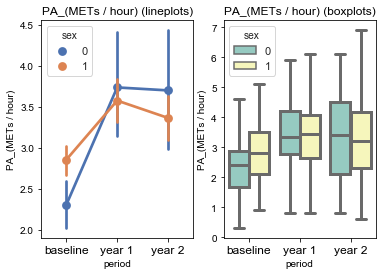

,Mean,std,N,year
sex,,,,
0,2.309273,1.083408,55,0
1,2.857969,1.009496,128,0
0,3.738462,2.397560,52,1
1,3.578070,1.470041,114,1
0,3.702439,2.394002,41,2
1,3.366667,1.466344,102,2


general statistics for PA_(METs / hour)

---------------------------
PA_(METs / hour) , ANOVA :


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps
0,sex,0.259497,1,181,0.259497,0.050364,8.226845e-01,NaN,0.000278,NaN
1,period,86.852537,2,362,43.426269,64.429978,1.155912e-24,1.020934e-20,0.262519,0.864838
2,Interaction,15.538366,2,362,7.769183,11.526855,1.402471e-05,NaN,0.059871,NaN


Interaction effect : significant !
----------------------------------------------
PA_(METs / hour) - posthocs :


,sex,A,B,T,dof,p-unc,p-corr,hedges
4,1,0,1,-4.389,196.942,0.000,0.000,-0.575
5,1,0,2,-2.985,172.168,0.003,0.010,-0.411
7,0,0,1,-3.935,70.124,0.000,0.001,-0.770
8,0,0,2,-3.471,52.244,0.001,0.004,-0.783


,period,A,B,T,dof,p-unc,p-corr,hedges
4,0,1,0,3.205,96.118,0.002,0.005,0.529
5,1,1,0,-0.446,69.074,0.657,0.813,-0.088
6,2,1,0,-0.837,52.501,0.406,0.813,-0.188


 
 
age_group


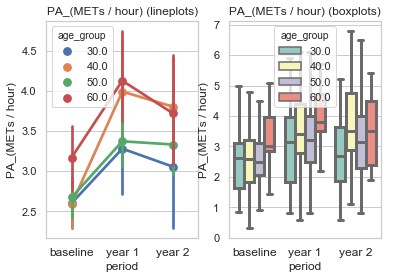

,Mean,std,N,year
age_group,,,,
30.0,2.599070,1.096312,43,0
40.0,2.585000,1.086842,50,0
50.0,2.671045,1.016108,67,0
60.0,3.167826,0.993286,23,0
30.0,3.279412,1.832994,34,1
40.0,3.991489,2.365773,47,1
50.0,3.371429,1.315470,63,1
60.0,4.127273,1.425677,22,1
30.0,3.053846,2.328129,26,2


general statistics for PA_(METs / hour)

---------------------------
PA_(METs / hour) , ANOVA :


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps
0,age_group,28.606056,3,179,9.535352,1.887573,1.333254e-01,NaN,0.030665,NaN
1,period,86.852537,2,358,43.426269,61.973392,7.730815e-24,1.020934e-20,0.257179,0.864838
2,Interaction,8.669630,6,358,1.444938,2.062064,5.700898e-02,NaN,0.033405,NaN


No interaction
----------------------------------------------
No posthoc for PA_(METs / hour) or change the statistics parameters and retest
 
 
PA_(METs / hour)_at_baseline_group


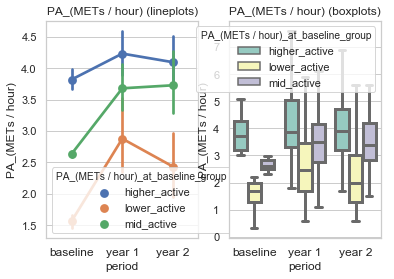

,Mean,std,N,year
PA_(METs / hour)_at_baseline_group,,,,
higher_active,3.818750,0.706106,64,0
lower_active,1.567049,0.447077,61,0
mid_active,2.635172,0.203049,58,0
higher_active,4.231667,1.437098,60,1
lower_active,2.878846,2.258434,52,1
mid_active,3.679630,1.408248,54,1
higher_active,4.094231,1.467212,52,2
lower_active,2.434091,1.697323,44,2
mid_active,3.727660,1.778214,47,2


general statistics for PA_(METs / hour)

---------------------------
PA_(METs / hour) , ANOVA :


C:\Users\BMELAB\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps
0,PA_(METs / hour)_at_baseline_group,269.294148,2,180,134.647074,36.525100,4.852035e-14,NaN,0.288679,NaN
1,period,86.852537,2,360,43.426269,62.936042,3.634960e-24,1.020934e-20,0.259064,0.864838
2,Interaction,11.126684,4,360,2.781671,4.031370,3.272840e-03,NaN,0.042873,NaN


Interaction effect : significant !
----------------------------------------------
PA_(METs / hour) - posthocs :


,PA_(METs / hour)_at_baseline_group,A,B,T,dof,p-unc,p-corr,hedges
6,higher_active,0,1,-2.010,84.667,0.048,0.238,-0.366
7,higher_active,0,2,-1.242,69.994,0.218,0.873,-0.246
9,lower_active,0,1,-4.120,54.413,0.000,0.001,-0.832
10,lower_active,0,2,-3.307,47.327,0.002,0.011,-0.749
12,mid_active,0,1,-5.398,55.052,0.000,0.000,-1.050
13,mid_active,0,2,-4.190,46.973,0.000,0.001,-0.905


,period,A,B,T,dof,p-unc,p-corr,hedges
6,0,higher_active,lower_active,21.404,107.224,0.000,0.000,3.767
7,0,higher_active,mid_active,12.837,74.337,0.000,0.000,2.217
8,0,lower_active,mid_active,-16.915,84.662,0.000,0.000,-3.031
9,1,higher_active,lower_active,3.716,84.120,0.000,0.002,0.721
10,1,higher_active,mid_active,2.070,111.176,0.041,0.096,0.385
11,1,lower_active,mid_active,-2.181,84.889,0.032,0.096,-0.424
12,2,higher_active,lower_active,5.078,85.685,0.000,0.000,1.045
13,2,higher_active,mid_active,1.112,89.472,0.269,0.269,0.224
14,2,lower_active,mid_active,-3.550,88.964,0.001,0.002,-0.737


 
 
change_in_"PA_(METs / hour)"_at_year1_group


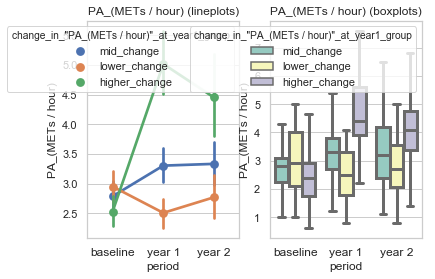

,Mean,std,N,year
"change_in_""PA_(METs / hour)""_at_year1_group",,,,
higher_change,2.525439,0.992709,57,0
lower_change,2.951818,1.080367,55,0
mid_change,2.786852,1.048575,54,0
higher_change,5.017544,2.065025,57,1
lower_change,2.507273,0.965489,55,1
mid_change,3.303704,1.101622,54,1
higher_change,4.452273,2.259707,44,2
lower_change,2.770213,1.270384,47,2
mid_change,3.333333,1.294067,48,2


general statistics for PA_(METs / hour)

---------------------------
PA_(METs / hour) , ANOVA :


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps
0,"change_in_""PA_(METs / hour)""_at_year1_group",122.109828,2,163,61.054914,14.223542,2.024492e-06,NaN,0.148590,NaN
1,period,73.014526,2,326,36.507263,58.690822,1.697080e-22,4.090107e-13,0.264742,0.864838
2,Interaction,134.159801,4,326,33.539950,53.920428,7.465620e-35,NaN,0.398171,NaN


Interaction effect : significant !
----------------------------------------------
PA_(METs / hour) - posthocs :


,"change_in_""PA_(METs / hour)""_at_year1_group",A,B,T,dof,p-unc,p-corr,hedges
6,mid_change,0,1,-2.497,106.000,0.014,0.098,-0.477
7,mid_change,0,2,-2.325,90.526,0.022,0.134,-0.463
9,lower_change,0,1,2.275,108.000,0.025,0.134,0.431
10,lower_change,0,2,0.770,90.864,0.443,0.886,0.154
12,higher_change,0,1,-8.212,112.000,0.000,0.000,-1.528
13,higher_change,0,2,-5.277,55.815,0.000,0.000,-1.148


,period,A,B,T,dof,p-unc,p-corr,hedges
6,0,mid_change,lower_change,-0.809,106.986,0.420,0.420,-0.154
7,0,mid_change,higher_change,1.347,107.716,0.181,0.361,0.254
8,0,lower_change,higher_change,2.173,108.430,0.032,0.128,0.408
9,1,mid_change,lower_change,4.011,104.661,0.000,0.001,0.764
10,1,mid_change,higher_change,-5.495,86.455,0.000,0.000,-1.021
11,1,lower_change,higher_change,-8.287,79.990,0.000,0.000,-1.538
12,2,mid_change,lower_change,2.140,92.999,0.035,0.128,0.436
13,2,mid_change,higher_change,-2.880,67.185,0.005,0.027,-0.610
14,2,lower_change,higher_change,-4.337,66.748,0.000,0.000,-0.918


In [9]:
## Run the ANOVA
candidates = ['sex','age_group', of_int+'_at_baseline_group', 'change_in_'+'"'+of_int+'"'+'_at_year1_group']
print(candidates, ' :')

for candidate in candidates:
    print(candidate)
    stats_who =[]
    for year in period:
        out = GeneralStats＿Who()
        out['year'] = year
        stats_who.append(out)
    
    stats_who = pd.concat(stats_who, axis=0)
    daaa=pd.concat(daa)
    AnovaPlot_Who()
    display(stats_who)
    print('general statistics for', of_int)
    print('')
    print('---------------------------')
    daaa.reset_index(inplace=True)
    AnovaStats_Who(daaa)  
    print(' ')
    print(' ')


In [10]:
print('The whole analysis has been successfully run')

The whole analysis has been successfully run
